# Assignment-3


In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Exercise-1


In [25]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
tf.random.set_seed(42)

In [26]:
def plot_history(history):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].plot(history.history['accuracy'], label='accuracy')
    axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_ylim([0.1, 1])
    axs[0].legend(loc='lower right')

    axs[1].plot(history.history['loss'], label='loss')
    axs[1].plot(history.history['val_loss'], label='val_loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend(loc='upper right')

    axs[2].text(0.1, 0.5, f'Final Train Acc: {history.history["accuracy"][-1]:.4f}\nFinal Val Acc: {history.history["val_accuracy"][-1]:.4f}', fontsize=12)
    axs[2].axis('off')

    plt.show()

In [27]:
def eval_model(model, x_test, y_test):
    y_prob = model.predict(x_test, batch_size=128, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)

    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [28]:
seqential_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_1.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_1, y_train_1 = x_train[:1000], y_train[:1000]
x_test_1 , y_test_1 = x_test[:200], y_test[:200]

x_tr_1, x_val_1, y_tr_1, y_val_1 = train_test_split(
    x_train_1, y_train_1, test_size=0.2, random_state=42, stratify=y_train_1
)

history_1 = seqential_model_1.fit(x_tr_1, y_tr_1,
                              epochs=50,
                              batch_size = 32,
                              validation_data=(x_val_1, y_val_1),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 - 1s - 59ms/step - accuracy: 0.5400 - loss: 1.5617 - val_accuracy: 0.7600 - val_loss: 0.9403
Epoch 2/50
25/25 - 0s - 16ms/step - accuracy: 0.8338 - loss: 0.6261 - val_accuracy: 0.8300 - val_loss: 0.5691
Epoch 3/50
25/25 - 0s - 16ms/step - accuracy: 0.8988 - loss: 0.3720 - val_accuracy: 0.8750 - val_loss: 0.4831
Epoch 4/50
25/25 - 0s - 15ms/step - accuracy: 0.9425 - loss: 0.2511 - val_accuracy: 0.8800 - val_loss: 0.4639
Epoch 5/50
25/25 - 0s - 15ms/step - accuracy: 0.9613 - loss: 0.1756 - val_accuracy: 0.8800 - val_loss: 0.4667
Epoch 6/50
25/25 - 0s - 15ms/step - accuracy: 0.9800 - loss: 0.1218 - val_accuracy: 0.8800 - val_loss: 0.4764
Epoch 7/50
25/25 - 0s - 14ms/step - accuracy: 0.9925 - loss: 0.0838 - val_accuracy: 0.8800 - val_loss: 0.4859
Epoch 8/50
25/25 - 0s - 14ms/step - accuracy: 0.9987 - loss: 0.0579 - val_accuracy: 0.8850 - val_loss: 0.4935
Epoch 9/50
25/25 - 0s - 15ms/step - accuracy: 1.0000 - loss: 0.0413 - val_accuracy: 0.8800 - val_loss: 0.5041


### Q1.1

At the end of training the model ended up with a validation accuracy on 86% and when evaluated on test set it ended up with 91% accuracy

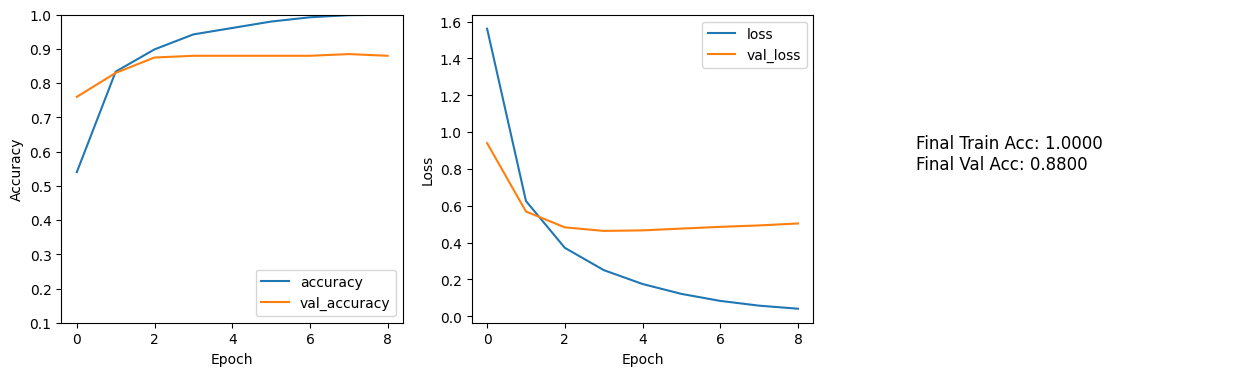

In [29]:
plot_history(history_1)

In [30]:
eval_model(seqential_model_1, x_test_1, y_test_1)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     1.0000    1.0000    1.0000        28
           2     0.6316    0.7500    0.6857        16
           3     0.9286    0.8125    0.8667        16
           4     0.9259    0.8929    0.9091        28
           5     1.0000    0.9500    0.9744        20
           6     0.9000    0.9000    0.9000        20
           7     0.9200    0.9583    0.9388        24
           8     1.0000    0.9000    0.9474        10
           9     0.8182    0.8571    0.8372        21

    accuracy                         0.9100       200
   macro avg     0.9124    0.9021    0.9059       200
weighted avg     0.9158    0.9100    0.9118       200

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 12  1  0  0  1  1  0  1]
 [ 0  0  3 13  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  1  0  0  2]
 [ 0  0  1  0  0 19  0  0  0  0]
 [ 0  0  1  0  1  0 18  0  0  0]
 [ 0  0  0

## Exercise-2

In [31]:
cifar = tf.keras.datasets.cifar10
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar.load_data()


In [32]:
seqential_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_2.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_2, y_train_2 = cifar_x_train[:5000].astype("float32")/255.0, cifar_y_train[:5000].ravel()
x_test_2,  y_test_2  = cifar_x_test[:1000].astype("float32")/255.0,  cifar_y_test[:1000].ravel()

x_tr_2, x_val_2, y_tr_2, y_val_2 = train_test_split(
    x_train_2, y_train_2, test_size=0.2, random_state=42, stratify=y_train_2
)

history_2 = seqential_model_2.fit(x_tr_2, y_tr_2,
                              epochs=50,
                              batch_size = 128,
                              validation_data=(x_val_2, y_val_2),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 - 2s - 64ms/step - accuracy: 0.1625 - loss: 3.3583 - val_accuracy: 0.1090 - val_loss: 2.5562
Epoch 2/50
32/32 - 1s - 20ms/step - accuracy: 0.2710 - loss: 2.0196 - val_accuracy: 0.2170 - val_loss: 2.0867
Epoch 3/50
32/32 - 1s - 19ms/step - accuracy: 0.3230 - loss: 1.8844 - val_accuracy: 0.2440 - val_loss: 2.1277
Epoch 4/50
32/32 - 1s - 19ms/step - accuracy: 0.3465 - loss: 1.8154 - val_accuracy: 0.2560 - val_loss: 2.1540
Epoch 5/50
32/32 - 1s - 18ms/step - accuracy: 0.3658 - loss: 1.7525 - val_accuracy: 0.2800 - val_loss: 2.0885
Epoch 6/50
32/32 - 1s - 18ms/step - accuracy: 0.3902 - loss: 1.6936 - val_accuracy: 0.2930 - val_loss: 2.0296
Epoch 7/50
32/32 - 1s - 19ms/step - accuracy: 0.4087 - loss: 1.6347 - val_accuracy: 0.3180 - val_loss: 1.9492
Epoch 8/50
32/32 - 1s - 18ms/step - accuracy: 0.4390 - loss: 1.5735 - val_accuracy: 0.3340 - val_loss: 1.9122
Epoch 9/50
32/32 - 1s - 18ms/step - accuracy: 0.4608 - loss: 1.5187 - val_accuracy: 0.3260 - val_loss: 1.9168
Epoch 10/50
32/32 - 1

### Q2.1

This model ended up with a validation accuracy on 37% on validation and a 33% accuracy on the test set.

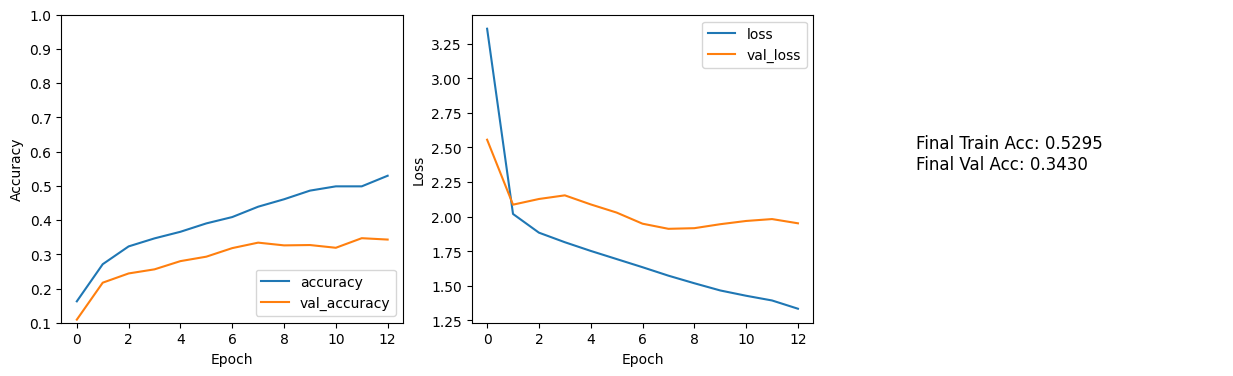

In [33]:
plot_history(history_2)

In [34]:
eval_model(seqential_model_2, x_test_2, y_test_2)

              precision    recall  f1-score   support

           0     0.2800    0.2718    0.2759       103
           1     0.5857    0.4607    0.5157        89
           2     0.1580    0.8200    0.2649       100
           3     0.3667    0.2136    0.2699       103
           4     0.2308    0.1000    0.1395        90
           5     0.2941    0.0581    0.0971        86
           6     0.5455    0.1071    0.1791       112
           7     0.5862    0.1667    0.2595       102
           8     0.5789    0.4151    0.4835       106
           9     0.5294    0.3303    0.4068       109

    accuracy                         0.2960      1000
   macro avg     0.4155    0.2943    0.2892      1000
weighted avg     0.4206    0.2960    0.2916      1000

[[28  1 55  2  0  0  1  1 12  3]
 [ 9 41 18  3  2  0  0  3  1 12]
 [ 5  1 82  2  5  1  2  1  1  0]
 [ 2  4 59 22  3  5  3  1  1  3]
 [ 5  2 65  4  9  1  1  2  0  1]
 [ 3  2 57 10  3  5  1  1  2  2]
 [ 2  1 76  8  9  2 12  0  0  2]
 [ 6  1 61

# Excercise-3

In [35]:
seqential_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_3.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_3, y_train_3 = x_train[:1000], y_train[:1000]
x_test_3 , y_test_3 = x_test[:200], y_test[:200]

x_tr_3, x_val_3, y_tr_3, y_val_3 = train_test_split(
    x_train_3, y_train_3, test_size=0.2, random_state=42, stratify=y_train_3
)

history_3 = seqential_model_3.fit(x_tr_3, y_tr_3,
                              epochs=50,
                              batch_size = 32,
                              validation_data=(x_val_3, y_val_3),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 - 2s - 62ms/step - accuracy: 0.3825 - loss: 1.8667 - val_accuracy: 0.7450 - val_loss: 1.0140
Epoch 2/50
25/25 - 0s - 17ms/step - accuracy: 0.7375 - loss: 0.8609 - val_accuracy: 0.8100 - val_loss: 0.6382
Epoch 3/50
25/25 - 0s - 16ms/step - accuracy: 0.8325 - loss: 0.5819 - val_accuracy: 0.8350 - val_loss: 0.5142
Epoch 4/50
25/25 - 0s - 16ms/step - accuracy: 0.8650 - loss: 0.4469 - val_accuracy: 0.8500 - val_loss: 0.4884
Epoch 5/50
25/25 - 0s - 16ms/step - accuracy: 0.8725 - loss: 0.3930 - val_accuracy: 0.8650 - val_loss: 0.4484
Epoch 6/50
25/25 - 0s - 16ms/step - accuracy: 0.9062 - loss: 0.3020 - val_accuracy: 0.8650 - val_loss: 0.4403
Epoch 7/50
25/25 - 0s - 16ms/step - accuracy: 0.9250 - loss: 0.2536 - val_accuracy: 0.8650 - val_loss: 0.4295
Epoch 8/50
25/25 - 0s - 16ms/step - accuracy: 0.9337 - loss: 0.2342 - val_accuracy: 0.8600 - val_loss: 0.4383
Epoch 9/50
25/25 - 0s - 16ms/step - accuracy: 0.9513 - loss: 0.1766 - val_accuracy: 0.8500 - val_loss: 0.4645
Epoch 10/50
25/25 - 0

### Q3.1

With alpha donut applied to training the model ended up with a 88% accuracy on the validation set and 92% accuracy on the test set.

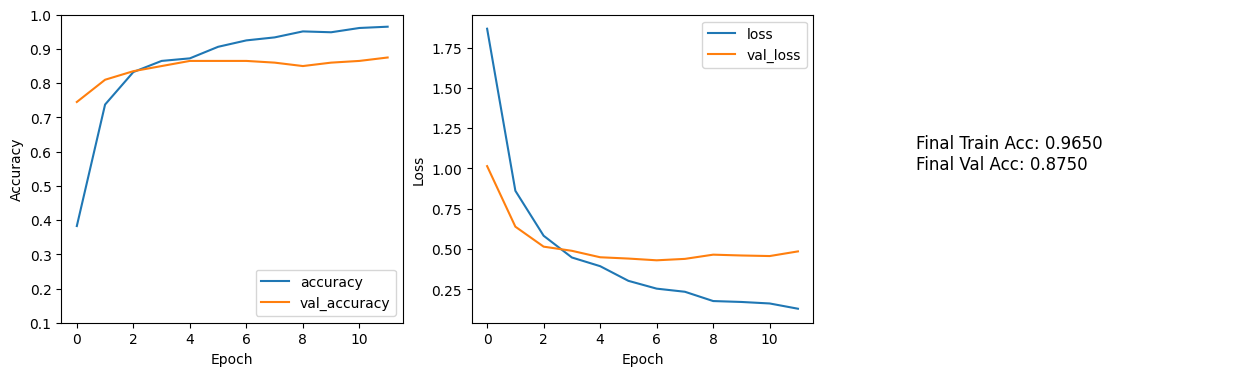

              precision    recall  f1-score   support

           0     0.9412    0.9412    0.9412        17
           1     1.0000    0.9643    0.9818        28
           2     0.7778    0.8750    0.8235        16
           3     0.9167    0.6875    0.7857        16
           4     1.0000    0.8214    0.9020        28
           5     0.8636    0.9500    0.9048        20
           6     0.9000    0.9000    0.9000        20
           7     0.9167    0.9167    0.9167        24
           8     0.9091    1.0000    0.9524        10
           9     0.7692    0.9524    0.8511        21

    accuracy                         0.9000       200
   macro avg     0.8994    0.9008    0.8959       200
weighted avg     0.9081    0.9000    0.8999       200

[[16  0  0  1  0  0  0  0  0  0]
 [ 0 27  0  0  0  1  0  0  0  0]
 [ 0  0 14  0  0  0  0  1  0  1]
 [ 0  0  2 11  0  2  0  0  1  0]
 [ 1  0  0  0 23  0  1  0  0  3]
 [ 0  0  0  0  0 19  1  0  0  0]
 [ 0  0  2  0  0  0 18  0  0  0]
 [ 0  0  0

In [36]:
plot_history(history_3)
eval_model(seqential_model_3, x_test_3, y_test_3)


### Q3.2

With the MC-dropout the accuracy ended up on 92% accuracy

In [37]:
mc_passes = 20
probs = []
for _ in range(mc_passes):
    p = seqential_model_3(x_test_3, training=True).numpy() 
    probs.append(p)
probs_mean = np.mean(probs, axis=0)
y_pred = probs_mean.argmax(axis=1)
mc_acc = (y_pred == y_test_3).mean()
print(f" MC-Dropout test accuracy: {mc_acc:.4f}")

 MC-Dropout test accuracy: 0.8850


# Excerice-2

In [ ]:
mobilenetv2_model = tf.keras.applications.MobileNetV2(
    include_top=False, weights="imagenet"
)

mobilenetv2_model.trainable = False

x_train_4, y_train_4 = cifar_x_train[:2000].astype("float32")/255.0, cifar_y_train[:2000].ravel()
x_test_4,  y_test_4  = cifar_x_test[:500].astype("float32")/255.0,  cifar_y_test[:500].ravel()

x_tr_4, x_val_4, y_tr_4, y_val_4 = train_test_split(
    x_train_4, y_train_4, test_size=0.2, random_state=42, stratify=y_train_4
)

seqential_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Resizing(224, 224, interpolation="bilinear", antialias=True),
    tf.keras.layers.Rescaling(2.0, offset=-1.0), 
    mobilenetv2_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, tf.keras.activations.relu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])


seqential_model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)


history_4 = seqential_model_4.fit(x_tr_4, y_tr_4,
                              epochs=5,
                              batch_size = 32,
                              validation_data=(x_val_4, y_val_4),
                              verbose=2,)

/var/folders/wb/vdxbcw4j5sd6ncmy_df497_w0000gn/T/ipykernel_27559/222160041.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenetv2_model = tf.keras.applications.MobileNetV2(


Epoch 1/5
50/50 - 10s - 203ms/step - accuracy: 0.4425 - loss: 1.9665 - val_accuracy: 0.6900 - val_loss: 0.9193
Epoch 2/5
50/50 - 6s - 127ms/step - accuracy: 0.6456 - loss: 1.1519 - val_accuracy: 0.7575 - val_loss: 0.7635
Epoch 3/5
50/50 - 6s - 127ms/step - accuracy: 0.7250 - loss: 0.9312 - val_accuracy: 0.7600 - val_loss: 0.8820
Epoch 4/5
50/50 - 6s - 124ms/step - accuracy: 0.7644 - loss: 0.7844 - val_accuracy: 0.7675 - val_loss: 0.7974
Epoch 5/5


### Q4.1

The model ended up with a 78% accuracy on the validation set and 75% accruacy on the test set.

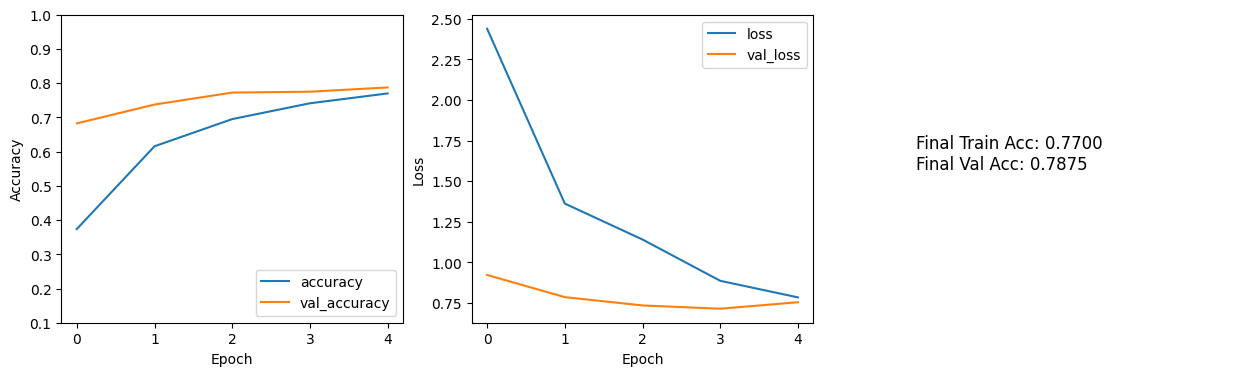

              precision    recall  f1-score   support

           0     0.6897    0.7018    0.6957        57
           1     0.9189    0.8293    0.8718        41
           2     1.0000    0.4510    0.6216        51
           3     0.4868    0.7551    0.5920        49
           4     0.6304    0.7250    0.6744        40
           5     0.7436    0.6042    0.6667        48
           6     0.8148    0.8148    0.8148        54
           7     0.7826    0.7660    0.7742        47
           8     0.8246    0.8246    0.8246        57
           9     0.8594    0.9821    0.9167        56

    accuracy                         0.7480       500
   macro avg     0.7751    0.7454    0.7452       500
weighted avg     0.7773    0.7480    0.7476       500

[[40  1  0  5  0  0  0  1  7  3]
 [ 2 34  0  1  0  0  0  0  0  4]
 [ 5  2 23  7  5  2  4  2  1  0]
 [ 0  0  0 37  3  5  2  2  0  0]
 [ 2  0  0  5 29  1  1  2  0  0]
 [ 0  0  0 12  4 29  1  2  0  0]
 [ 1  0  0  6  1  0 44  1  1  0]
 [ 2  0  0

In [ ]:
plot_history(history_4)
eval_model(seqential_model_4, x_test_4, y_test_4)

# Exercise-5

In [ ]:
import tensorflow_datasets as tfds
tf.random.set_seed(42)

def prep(x, y):
    x = tf.cast(x, tf.float32) / 255.0  
    return x, tf.cast(y, tf.int64)

train_ds = (tfds.load("svhn_cropped", split="train[:1600]", as_supervised=True)
            .map(prep).shuffle(1600, seed=42, reshuffle_each_iteration=False)
            .batch(32).prefetch(tf.data.AUTOTUNE))
val_ds   = (tfds.load("svhn_cropped", split="train[1600:2000]", as_supervised=True)
            .map(prep).batch(32).prefetch(tf.data.AUTOTUNE))

test_ds  = (tfds.load("svhn_cropped", split="test[:500]", as_supervised=True)
            .map(prep)
            .batch(32)
            .prefetch(tf.data.AUTOTUNE))

model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_5.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history_5 = model_5.fit(train_ds, epochs=15, validation_data=val_ds, verbose=2, batch_size=32)



Epoch 1/15
50/50 - 2s - 39ms/step - accuracy: 0.1850 - loss: 2.2677 - val_accuracy: 0.2100 - val_loss: 2.2251
Epoch 2/15
50/50 - 1s - 15ms/step - accuracy: 0.1844 - loss: 2.2407 - val_accuracy: 0.2100 - val_loss: 2.1838
Epoch 3/15
50/50 - 1s - 15ms/step - accuracy: 0.2606 - loss: 2.1239 - val_accuracy: 0.2850 - val_loss: 1.9621
Epoch 4/15
50/50 - 1s - 14ms/step - accuracy: 0.3762 - loss: 1.8298 - val_accuracy: 0.5425 - val_loss: 1.4467
Epoch 5/15
50/50 - 1s - 14ms/step - accuracy: 0.5106 - loss: 1.5337 - val_accuracy: 0.6125 - val_loss: 1.2515
Epoch 6/15
50/50 - 1s - 14ms/step - accuracy: 0.5769 - loss: 1.3429 - val_accuracy: 0.6975 - val_loss: 1.0475
Epoch 7/15
50/50 - 1s - 15ms/step - accuracy: 0.6338 - loss: 1.2301 - val_accuracy: 0.6300 - val_loss: 1.5014
Epoch 8/15
50/50 - 1s - 14ms/step - accuracy: 0.6844 - loss: 1.1318 - val_accuracy: 0.6725 - val_loss: 1.2888
Epoch 9/15
50/50 - 1s - 14ms/step - accuracy: 0.7237 - loss: 1.0753 - val_accuracy: 0.6750 - val_loss: 1.5486
Epoch 10/1

### Q5.1

The model ended up the a validation accuracy on 67% on the validation set and a 65% accuracy on the test set

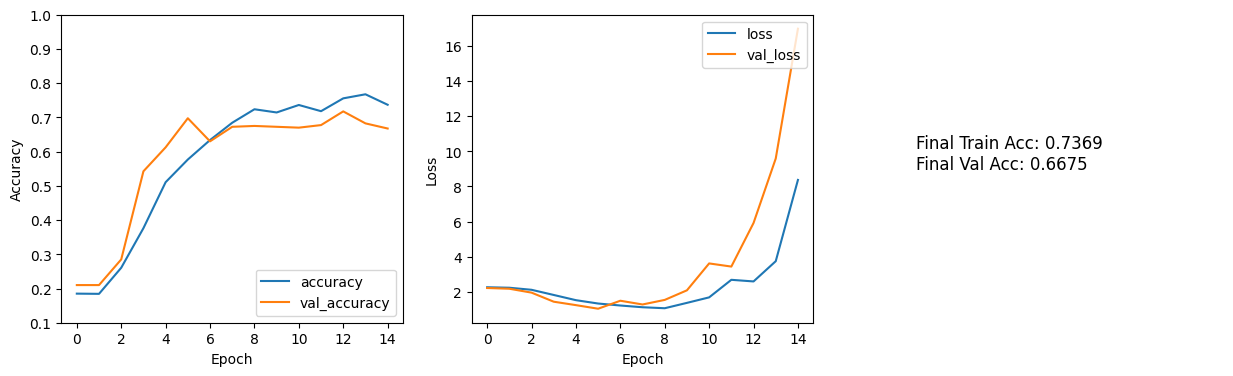

Test accuracy: 0.6480


In [ ]:
plot_history(history_5)
test_loss, test_acc = model_5.evaluate(test_ds, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


# Exercise-6

In [ ]:
model_6 = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32,32,3)),
        tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.25),             
        tf.keras.layers.Dense(10, activation="softmax"),
    ])

model_6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])


history_6 = model_6.fit(train_ds, epochs=15, verbose=2, validation_data=val_ds)

Epoch 1/15
50/50 - 1s - 22ms/step - accuracy: 0.1587 - loss: 2.2833 - val_accuracy: 0.2100 - val_loss: 2.2358
Epoch 2/15
50/50 - 0s - 9ms/step - accuracy: 0.1919 - loss: 2.2550 - val_accuracy: 0.2100 - val_loss: 2.2265
Epoch 3/15
50/50 - 0s - 8ms/step - accuracy: 0.1912 - loss: 2.2491 - val_accuracy: 0.2100 - val_loss: 2.2253
Epoch 4/15
50/50 - 0s - 8ms/step - accuracy: 0.1919 - loss: 2.2431 - val_accuracy: 0.2100 - val_loss: 2.2207
Epoch 5/15
50/50 - 0s - 8ms/step - accuracy: 0.1937 - loss: 2.2422 - val_accuracy: 0.2100 - val_loss: 2.2217
Epoch 6/15
50/50 - 0s - 8ms/step - accuracy: 0.1944 - loss: 2.2366 - val_accuracy: 0.2100 - val_loss: 2.2168
Epoch 7/15
50/50 - 0s - 8ms/step - accuracy: 0.1944 - loss: 2.2283 - val_accuracy: 0.2100 - val_loss: 2.2077
Epoch 8/15
50/50 - 0s - 8ms/step - accuracy: 0.1950 - loss: 2.2191 - val_accuracy: 0.2100 - val_loss: 2.1951
Epoch 9/15
50/50 - 0s - 8ms/step - accuracy: 0.2037 - loss: 2.2041 - val_accuracy: 0.2175 - val_loss: 2.1749
Epoch 10/15
50/50 

### Q6.1

This model ended up on a 53% accuracy on validation set and 51% accuracy on the test set. We see the model loss is still dropping at 15 epochs so a longer running model should get higher accuracy.

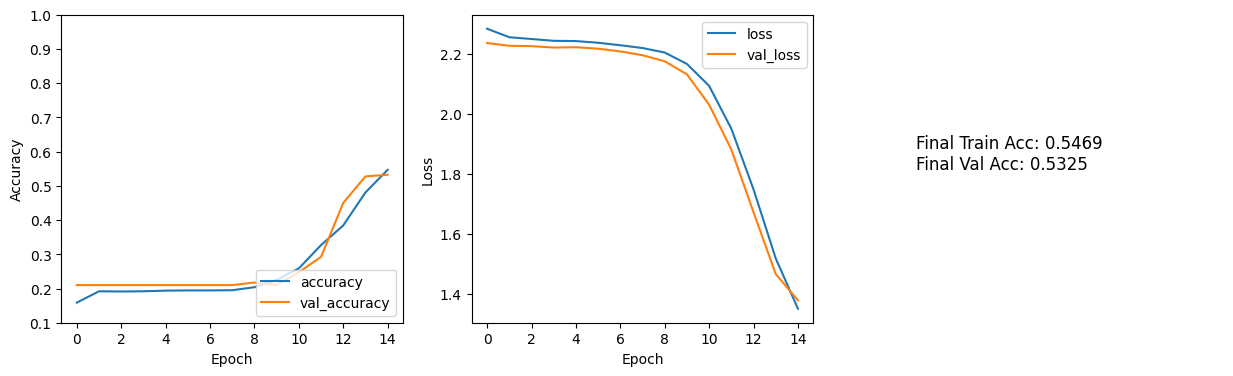

Test accuracy: 0.5100


In [ ]:
plot_history(history_6)
test_loss, test_acc = model_6.evaluate(test_ds, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

### Q6.2 & Q6.3

When measuring accuracy with mc-dropout it ended up with 48% accuracy and the average epstimetic uncertainty ended up 0.002 which means there is little parameter uncertainty. This means that the model is condifently wrong. For the mc dropout the model seems to underfit, so adding dropout at inference probably increase bias and results in worse accuracy.

In [ ]:
te = tfds.load("svhn_cropped", split="test[:500]", as_supervised=True, batch_size=-1)
x_test_np, y_test_np = tfds.as_numpy(te)
x_test_np = x_test_np.astype("float32") / 255.0

mc_passes = 20
probs = np.stack(
    [model_6(x_test_np, training=True).numpy() for i in range(mc_passes)],
    axis=0
) 

probs_mean = probs.mean(axis=0)        
y_pred = probs_mean.argmax(axis=1)
mc_acc = (y_pred == y_test_np).mean()

pred_var = probs.var(axis=0)    
      
epi_unc = pred_var.mean(axis=1).mean() 

print(f"MC acc: {mc_acc:.4f}")
print(f"Avg epistemic uncertainty: {epi_unc:.3f}")

MC acc: 0.4920
Avg epistemic uncertainty: 0.002
